In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os, fnmatch, png, re
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image


def readPngFile(filename):
    '''
    Read a single PNG file

    filename = fully qualified file name

    Return: 3D numpy array (rows x cols x chans)

    Note: all pixel values are floats in the range 0.0 .. 1.0

    This implementation relies on the pypng package
    '''
    #print("reading:", filename)
    # Load in the image meta-data
    im = np.asarray(Image.open(filename), dtype=np.uint64)
    width, height = im.shape[0], im.shape[1]
    channels = 3

    # Reshape into rows x cols x chans
    image_3d = im.reshape(width, height, channels)/255.0
    return image_3d


def read_images_from_directory(directory, file_regexp):
    '''
    Read a set of images from a directory.  All of the images must be the

    directory = Directory to search

    file_regexp = a regular expression to match the file names against

    Return: 4D numpy array (images x rows x cols x chans)
    '''

    # Get all of the file names
    files = sorted(os.listdir(directory))

    # Construct a list of images from those
    list_of_images = [readPngFile(directory + "/" + f) for f in files if re.search(file_regexp, f) ]

    # Create a 3D numpy array
    return np.array(list_of_images, dtype=np.float32)


def read_image_set_from_directories(directory, spec):
    '''
    Read a set of images from a set of directories

    directory  = base directory to read from

    Return: 4D numpy array (images x rows x cols x chans)

    '''
    out = read_images_from_directory(directory + "/" + spec[0][0], spec[0][1])
    return out



/home/omar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def new_neuron_layer(X1, X2, n_neurons, name, activation = None):
    with tf.name_scope(name):
        if(X1 == None):
            n_inputs = int(X2.get_shape()[1])
            stddev = 2/np.sqrt(n_inputs)
            init = tf.truncated_normal((n_inputs, n_neurons), stddev = stddev)
            w = tf.Variable(init, name = "weights")
            b = tf.Variable(tf.zeros([n_neurons]), name = "biases")
            z = tf.matmul(X2, w) + b
            if activation == "relu":
                return tf.nn.relu(z)
            else:
                return z
        elif (X2 == None):
            n_inputs = int(X2.get_shape()[1])
            stddev = 2/np.sqrt(n_inputs)
            init = tf.truncated_normal((n_inputs, n_neurons), stddev = stddev)
            w = tf.Variable(init, name = "weights")
            b = tf.Variable(tf.zeros([n_neurons]), name = "biases")
            z = tf.matmul(X2, w) + b
            if activation == "relu":
                return tf.nn.relu(z)
            else:
                return z
        else: 
            n_inputs1 = int(X1.get_shape()[1])
            n_inputs2 = int(X2.get_shape()[1])
            stddev1 = 2 / np.sqrt(n_inputs1)
            stddev2 = 2 / np.sqrt(n_inputs2)
            init1 = tf.truncated_normal((n_inputs1, n_neurons), stddev = stddev1)
            init2 = tf.truncated_normal((n_inputs2, n_neurons), stddev = stddev2)
            W1 = tf.Variable(init1, name = "weights1")
            W2 = tf.Variable(init2, name = "weights2")
            b = tf.Variable(tf.zeros([n_neurons]), name = "biases")
            #c = tf.matmul(X1,W1) + b
            z = tf.add(tf.matmul(X1,W1),tf.matmul(X2,W2))
            if activation == "relu":
                return tf.nn.relu(z)
            else:
                return z
            
        
        

In [3]:
def new_neuron_layer_gating(X1, X2, n_neurons, name, activation = None):
    with tf.name_scope(name):
        if(X1 == None):
            n_inputs = int(X2.get_shape()[1])
            stddev = 2/np.sqrt(n_inputs)
            init = tf.truncated_normal((n_inputs, n_neurons), stddev = stddev)
            w = tf.Variable(init, name = "weights")
            b = tf.Variable(tf.zeros([n_neurons]), name = "biases")
            z = tf.matmul(X2, w) + b
            if activation == "relu":
                return tf.nn.relu(z)
            else:
                return z
        elif (X2 == None):
            n_inputs = int(X2.get_shape()[1])
            stddev = 2/np.sqrt(n_inputs)
            init = tf.truncated_normal((n_inputs, n_neurons), stddev = stddev)
            w = tf.Variable(init, name = "weights")
            b = tf.Variable(tf.zeros([n_neurons]), name = "biases")
            z = tf.matmul(X2, w) + b
            if activation == "relu":
                return tf.nn.relu(z)
            else:
                return z
        else: 
            n_inputs1 = int(X1.get_shape()[1])
            n_inputs2 = int(X2.get_shape()[1])
            stddev1 = 2 / np.sqrt(n_inputs1)
            stddev2 = 2 / np.sqrt(n_inputs2)
            init1 = tf.truncated_normal((n_inputs1, n_neurons), stddev = stddev1)
            init2 = tf.truncated_normal((n_inputs2, n_neurons), stddev = stddev2)
            W1 = tf.Variable(init1, name = "weights1")
            W2 = tf.Variable(init2, name = "weights2")
            b = tf.Variable(tf.zeros([n_neurons]), name = "biases")
            #c = tf.matmul(X1,W1) + b
            z = tf.add(tf.matmul(X1,W1),tf.matmul(X2,W2))
            if activation == "relu":
                return tf.nn.relu(z)
            else:
                return z
            
        
        

In [4]:
def slices_to_dims(slice_indices):
    
    """
      Args:
        slice_indices: An [N, k] Tensor mapping to column indices.
      Returns:
        An index Tensor with shape [N * k, 2], corresponding to indices suitable for
        passing to SparseTensor.
    """
    slice_indices = tf.cast(slice_indices, tf.int64)
    num_rows = tf.shape(slice_indices, out_type=tf.int64)[0]
    row_range = tf.range(num_rows)
    item_numbers = slice_indices * num_rows + tf.expand_dims(row_range, axis=1)
    item_numbers_flat = tf.reshape(item_numbers, [-1])
    return tf.stack([item_numbers_flat % num_rows, 
                   item_numbers_flat // num_rows], axis=1)

In [5]:
def single_hidden_network (X, n_hidden1, n_hidden2, n_outs, activation, keep_prob ):
    hidden1 = new_neuron_layer(None, X, n_hidden1,"hidden", activation = activation)
    hidden2 = new_neuron_layer(None, hidden1, n_hidden2, "hidden2", activation = activation)
    with_dropout = tf.nn.dropout(hidden2, keep_prob)
    output_layer = new_neuron_layer(None, with_dropout, n_outs, "outs")
    return output_layer

In [6]:
def single_hidden_network_gating (X, n_hidden1, n_outs, activation ):
    hidden1 = new_neuron_layer_gating(None, X, n_hidden1,"hidden", activation = activation)
    #hidden2 = new_neuron_layer_gating(None, hidden1, n_hidden2, "hidden2", activation = activation)
    output_layer = new_neuron_layer_gating(None, hidden1, n_outs, "outs")
    return output_layer

In [7]:
def accuracy(predictions, labels):
    return (100.0* predictions == labels )/predictions.shape[0]

In [122]:
# import os
# import cv2
# import numpy as np
# def load_data(img_dir):
#     return np.array([cv2.imread(os.path.join(img_dir, img)).flatten() for img in os.listdir(img_dir) if img.endswith(".jpg")])

In [123]:
# directory = '/home/omar/Desktop/test_images'
# img_arr = load_data(directory)

In [60]:
# Specify the directory in which we will read the data from
print("Loading in data...")
directory = '/media/omar/DATA/Driving_Dist_dataset/train'
directory2 = '/media/omar/DATA/Driving_Dist_dataset/'

# Obtain the features and labels from the data in the directory
training_dict = {}
validation_dict = {}
test_dict = {}
key = 't_io_c'
folder = 'c'

for i in range(10):

    key += str(i)
    folder += str(i)

    print("from %s" % folder)

    ins = read_image_set_from_directories(directory, [[folder, 'img_.([1-9][0-9]{0,1}).jpg']])
    outs = np.ones(ins.shape[0]) * i

    training_dict[key] = [ins, outs]

    key = 't_io_c'
    folder = 'c'

print("Done Loading")

Loading in data...
from c0
from c1
from c2
from c3
from c4
from c5
from c6
from c7
from c8
from c9
Done Loading


In [61]:
ins.shape

(26, 480, 640, 3)

In [62]:
# Split the training data up into training and validation
tr = 0.7
va = 0.3

size = np.min([len(val[0]) for key, val in training_dict.items()])
t = int(size * tr)
v = t + int(size - t)

for key, val in training_dict.items():
    training_dict[key] = (val[0][:t], val[1][:t])
    validation_dict[key] = (val[0][t:v], val[1][t:v])

# # Get the testing data for which class we will be predicting from
# ins = read_image_set_from_directories(directory2, [['test', 'img_.([1-9]{0,1}).jpg']])
# outs = np.zeros(ins.shape[0])

# test_dict['io'] = (ins, outs)

X_train, y_train, X_valid, y_valid = [],[],[],[] # initial shape may not work 11059200

for key, val in training_dict.items():
    if key == 't_io_c0':
        X_train = val[0]
        y_train = val[1]
    else:
        X_train = np.append(X_train, val[0], axis=0)
        y_train = np.append(y_train, val[1], axis=0)

for key, val in validation_dict.items():
    if key == 't_io_c0':
        X_valid = val[0]
        y_valid = val[1]
    else:
        X_valid = np.append(X_valid, val[0], axis=0)
        y_valid = np.append(y_valid, val[1], axis=0)


In [51]:
training_dict

{'t_io_c0': (array([[[[0.22, 0.3 , 0.25],
           [0.22, 0.3 , 0.25],
           [0.22, 0.3 , 0.25],
           ...,
           [0.29, 0.33, 0.35],
           [0.01, 0.04, 0.06],
           [0.21, 0.23, 0.25]],
  
          [[0.22, 0.3 , 0.25],
           [0.22, 0.3 , 0.25],
           [0.22, 0.3 , 0.25],
           ...,
           [0.38, 0.42, 0.44],
           [0.01, 0.04, 0.06],
           [0.22, 0.25, 0.27]],
  
          [[0.23, 0.31, 0.25],
           [0.23, 0.31, 0.25],
           [0.23, 0.31, 0.25],
           ...,
           [0.49, 0.55, 0.56],
           [0.01, 0.07, 0.08],
           [0.26, 0.32, 0.33]],
  
          ...,
  
          [[0.02, 0.03, 0.01],
           [0.02, 0.03, 0.01],
           [0.02, 0.03, 0.01],
           ...,
           [0.05, 0.05, 0.06],
           [0.05, 0.07, 0.07],
           [0.06, 0.08, 0.09]],
  
          [[0.02, 0.03, 0.01],
           [0.02, 0.03, 0.01],
           [0.02, 0.03, 0.01],
           ...,
           [0.05, 0.05, 0.06],
       

In [63]:
ins= X_train
outs = y_train
ins_val = X_valid
outs_val = y_valid

In [68]:
ins.shape

(100, 480, 640, 3)

In [69]:
ins_val.shape

(50, 480, 640, 3)

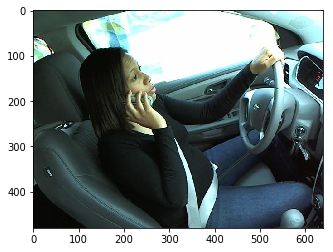

In [67]:
plt.imshow(ins_val[10].astype(np.float32))

In [400]:
outs_val[20]

6.0

In [190]:
training_dict

{'t_io_c0': [array([[[[0.21960784, 0.29803923, 0.2509804 ],
           [0.21960784, 0.29803923, 0.2509804 ],
           [0.21960784, 0.29803923, 0.2509804 ],
           ...,
           [0.28627452, 0.32941177, 0.34509805],
           [0.01176471, 0.03921569, 0.0627451 ],
           [0.20784314, 0.22745098, 0.2509804 ]],
  
          [[0.22352941, 0.3019608 , 0.25490198],
           [0.22352941, 0.3019608 , 0.25490198],
           [0.22352941, 0.3019608 , 0.25490198],
           ...,
           [0.38039216, 0.42352942, 0.4392157 ],
           [0.00784314, 0.04313726, 0.0627451 ],
           [0.21568628, 0.2509804 , 0.27058825]],
  
          [[0.22745098, 0.30980393, 0.2509804 ],
           [0.22745098, 0.30980393, 0.2509804 ],
           [0.22745098, 0.30980393, 0.2509804 ],
           ...,
           [0.4862745 , 0.54509807, 0.5568628 ],
           [0.00784314, 0.06666667, 0.07843138],
           [0.2627451 , 0.31764707, 0.32941177]],
  
          ...,
  
          [[0.02352941, 0.027

In [189]:
outs

array([9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9.])

In [15]:
# Specify the directory in which we will read the data from
print("Loading in data...")
directory = '/media/omar/DATA/Driving_Dist_dataset/train'
#directory2 = '../../Users/Devio/Desktop/imgs/'

# Obtain the features and labels from the data in the directory
training_dict = {}
validation_dict = {}
test_dict = {}
key = 't_io_c'
folder = 'c'

for i in range(10):

    key += str(i)
    folder += str(i)

    print("from %s" % folder)

    ins_val = read_image_set_from_directories(directory, [[folder, 'img_.([1-9][0-3]{0,1}).jpg']])
    outs_val = np.ones(ins_val.shape[0]) * i

    validation_dict[key] = [ins_val, outs_val]

    key = 't_io_c'
    folder = 'c'

print("Done Loading")

Loading in data...
from c0
from c1
from c2
from c3
from c4
from c5
from c6
from c7
from c8
from c9
Done Loading


In [15]:
ins_val.shape

(30, 480, 640, 3)

In [16]:
outs_val[10]

3.0

In [17]:
ins.shape

(120, 480, 640, 3)

In [15]:
def create_expert(name, X,ins, outs, n_filters1, n_filters2, keep_prob):
    with tf.name_scope(name):
        ins_shape = ins.shape
        outs_shape = outs.shape
        avg_pool = tf.nn.avg_pool(X, ksize = [1,2,2,1], strides = [1,2,2,1], padding = "VALID")
        size_r = ins_shape[1]/2
        size_c = ins_shape[2]/2
        stddev = 1.0/100
        init1 = tf.truncated_normal((5,5,3,n_filters1), stddev = stddev)
        filters1 = tf.Variable(init1, name = "filters1")
        
        conv1 = tf.nn.conv2d(avg_pool, filters1, strides = [1,1,1,1], padding = "SAME")
        
        max_pool = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = "VALID")
        size_r = size_r/2
        size_c = size_c/2
        
        init2 = tf.truncated_normal((3,3,n_filters1, n_filters2), stddev = stddev)
        
        filters2 = tf.Variable(init2, name = "filters2")
        
        conv2 = tf.nn.conv2d(max_pool, filters2, strides = [1,1,1,1], padding = "SAME")

        conv2_reshape = tf.reshape(conv2, (-1, 120*160*n_filters2 ))
        
        logits = single_hidden_network(conv2_reshape, 50, 20, 10, "relu", keep_prob)
        
        logits = tf.identity(logits, name = name + "logits")
    return logits

In [16]:
def create_Gating2(name,X, Y, ins, outs, n_neurons = 10):
    ins_shape = ins.shape
    outs_shape = outs.shape
    with tf.name_scope(name):
        
        gating_reshape = tf.reshape(X, (-1, 480*640*3))
        
        logits_gating = single_hidden_network_gating(gating_reshape, 20, 3, "relu")
    return logits_gating
        
        #logtis_gating = tf.identity(logits_gating, name = "logits_gating")
        
        #logits_softmax = tf.nn.softmax(logits_gating, name = "logits_softmax")
        
#         dense = tf.layers.dense(inputs = X, units = n_neurons, activation = tf.nn.relu)
        
#         logits_gating = tf.layers.dense(inputs = dense, units = 3, name = "logits_gating")
        
#         logits_softmax =tf.nn.softmax(logits_gating, name = "logits_softmax")

In [73]:
def create_network_CNN2(name, ins, outs, n_filters1, n_filters2):
    train_size = 50
    ins_shape = ins.shape
    outs_shape = outs.shape
    with tf.name_scope(name):
        x= tf.placeholder(tf.float32, shape = (None, ins_shape[1], ins_shape[2], ins_shape[3]), name ="x")
        y = tf.placeholder(dtype = tf.float32, shape = (None, 1) , name = "y")
        labels_int = tf.placeholder(tf.int32, shape = (None, 1), name = "labels")
        keep_prob = tf.placeholder(tf.float32, name = "keep_prob")
        
        logits1 = create_expert("net1", x, ins, outs, 20, 40, keep_prob)
        logits2 = create_expert("net2", x, ins, outs, 30, 60, keep_prob)
        logits3 = create_expert("net3", x, ins, outs, 15, 30, keep_prob)
        
        logits1 = tf.identity(logits1, name = "net1logits")
        logits2 = tf.identity(logits2, name = "net2logits")
        logits3 = tf.identity(logits3, name = "net3logits")
        
        logits_gating = create_Gating2("gating", x, y, ins, outs, 20)
        
        logits_gating = tf.identity(logits_gating, name = "logits_gating")
        
        logits_softmax = tf.nn.softmax(logits_gating, name = "logits_softmax")
        
        logits1_class = tf.argmax(input = logits1, axis = 1)
        logits2_class = tf.argmax(input = logits2, axis = 1)
        logits3_class = tf.argmax(input = logits3, axis = 1)
    
        comb_logits = tf.concat([logits1_class, logits2_class, logits3_class], -1)
    
        comb_logits2 = tf.cast(comb_logits, tf.float32)
    
        comb_logits3 = tf.reshape(comb_logits2,[train_size, 3])
    
        values, indices = tf.nn.top_k(logits_gating, k = 2)
        
        values = tf.identity(values, name = "values")
        indices = tf.identity(indices, name = "indices")
    
        soft = tf.nn.softmax(values)
    
#     rows_gating = soft.get_shape().as_list()
    
#     a = rows_gating[0]
    
        #The size of the sparse tensor is number of images (batch size) * 3 (number of channels)
        #a = train_size
    
        b = tf.shape(x)[0]
    
        dense_shape = tf.shape(logits_gating, out_type = tf.int64)
    
        sparse_indices = slices_to_dims(indices)
    
        sparse_tensor = tf.sparse_reorder(tf.SparseTensor( indices = sparse_indices, values = tf.reshape(soft, [-1]), dense_shape = dense_shape))
    
        densified_top = tf.sparse_tensor_to_dense(sparse_tensor, name = "densified_top")
    
        sum_logits = tf.reduce_sum(logits_softmax, 0,name = "sum_logits")
    
        mean, variance = tf.nn.moments(sum_logits, axes = [0])
        
        mean = tf.identity(mean, name = "mean")
        variance = tf.identity(variance, name = "variance")
    
#     error1 = tf.square(tf.norm(y - logits1))
#     error2 = tf.square(tf.norm(y - logits2))
#     error3 = tf.square(tf.norm(y - logits3))
    
        error1 = tf.losses.sparse_softmax_cross_entropy(labels = labels_int, logits = logits1)
        error2 = tf.losses.sparse_softmax_cross_entropy(labels = labels_int, logits = logits2)
        error3 = tf.losses.sparse_softmax_cross_entropy(labels = labels_int, logits = logits3)
    
    
    
        error = tf.Variable(tf.zeros([1,30]))
    
        error = [error1, error2, error3]
    
#     ind_pred = tf.Variable(tf.zeros([1,3]))
    
#     ind_pred = [logits1, logits2, logits3]
    
        prediction = tf.reduce_sum(tf.multiply(densified_top, comb_logits3),1, name = "prediction")
        loss =  tf.reduce_mean(tf.multiply(densified_top, error)) + 0.001*variance
        
        loss = tf.identity(loss, name = "loss")
    
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001, name = "optimizer")
        training_op = optimizer.minimize(loss, name = "train_op")
        s = y.shape
        pred_shape = prediction.shape
    
#         auc, update_op = tf.metrics.auc(y, prediction, name = "my_auc")
        
        
    
#         running_vars = tf.get_collection(tf.GraphKeys.LOCAL_VARIABLES, scope = "my_auc")
    
#         running_vars_initializer = tf.variables_initializer(var_list = running_vars)

       
    
    
        
        
        
        
        
        
        

In [42]:
outs_val.shape

(30,)

In [19]:
import seaborn as sn

In [78]:
def train_network3(namespace_mix,n_filter1, n_filter2, ins_training, outs_training, ins_validation, outs_validation):
    g = tf.get_default_graph()
    for i in tf.get_default_graph().get_operations():
        print (i.name)
    ind_predict = 0
    n_epochs = 200
    train_size = 50
    m = ins_training.shape[0]
    x = g.get_tensor_by_name(namespace_mix + "/x:0")
    y = g.get_tensor_by_name(namespace_mix + "/y:0")
    labels_int = g.get_tensor_by_name(namespace_mix + "/labels:0")
    keep_prob = g.get_tensor_by_name(namespace_mix + "/keep_prob:0")
    indices = g.get_tensor_by_name(namespace_mix + "/indices:0")
    prediction = g.get_tensor_by_name(namespace_mix + "/prediction:0")
    
    logits1 = g.get_tensor_by_name(namespace_mix + "/net1logits:0")
    logits2 = g.get_tensor_by_name(namespace_mix + "/net2logits:0")
    logits3 = g.get_tensor_by_name(namespace_mix + "/net3logits:0")
    training_op = g.get_operation_by_name(namespace_mix + "/train_op")
    loss = g.get_tensor_by_name(namespace_mix + "/loss:0")
    variance = g.get_tensor_by_name(namespace_mix + "/variance:0")
    sum_logits = g.get_tensor_by_name(namespace_mix + "/sum_logits:0")
    densified_top = g.get_tensor_by_name(namespace_mix + "/densified_top:0")
    
    logits_gating = g.get_tensor_by_name(namespace_mix + "/logits_gating:0")
    logits_softmax = g.get_tensor_by_name(namespace_mix + "/logits_softmax:0")
    
    num_classes = 1
    
    #Confusion Matrix
    conf_matrix = tf.confusion_matrix(labels = y, predictions = prediction)
    string_list = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']
    df_cm = pd.DataFrame(conf_matrix, index = [i for i in string_list],
                         columns = [i for i in string_list])
    
    pred_reshape = tf.reshape(prediction, [train_size * num_classes, 1])
    y_reshape = tf.reshape(y, [train_size * num_classes, 1])
    
    correct_prediction_all = tf.equal(tf.round(pred_reshape), tf.round(y_reshape))
    accuracy_all = tf.reduce_mean(tf.cast(correct_prediction_all, tf.float32))
        
#     auc, update_op = tf.metrics.auc(y, prediction, name = "my_auc")
        
        
    
#     running_vars = tf.get_collection(tf.GraphKeys.LOCAL_VARIABLES, scope = "my_auc")
    
#     running_vars_initializer = tf.variables_initializer(var_list = running_vars)
    
    #Printing Sparse INdices value
#     sparse_indices = slices_to_dims(indices)
    mse_val_list = []
    mse_list = []
    epoch_list = []
    conf_list = []
    filter_list = []
    acc_list = []
    d = {}
    filter_list.append(n_filter1)
    filter_list.append(n_filter2)
    d["filters"] = filter_list
    
    #acc = accuracy(prediction, y)
   
    #sess.run(running_vars_initializer)    
    feed_dict_validation = {x:ins_validation, y:outs_validation.reshape(-1,1),labels_int:outs_validation.reshape(-1,1), keep_prob: 1.0}
    for  epoch in range(n_epochs):
            
        #session.run(running_vars_initializer)
        # Random set of training points
        inds = np.random.permutation(m)[0:train_size]
        x_batch = ins_training[inds,:].astype(np.float32)
        y_batch = outs_training[inds].astype(np.float32).reshape(-1,1)
        feed_dict={x: x_batch, y: y_batch,labels_int:y_batch, keep_prob: 0.5}



        # One step of learning
        sess.run(training_op, feed_dict=feed_dict)
        
        #ess.run(update_op, feed_dict = feed_dict_validation)

#         sess.run(update_op, feed_dict = feed_dict_validation)
        

#         auc_validation = sess.run([auc], feed_dict = feed_dict_validation)
            
        # Report results
        if epoch % 10 == 0:
            
#             df_cm_eval = df_cm.eval(feed_dict = feed_dict_validation)
#             sn.set(font_scale = 1.4)
#             sn.heatmap(df_cm_eval, annot=True, annot_kws = {"size": 16})
#             plt.show
#            print("Confusion Matrix = ", conf_matrix.eval(feed_dict = feed_dict_validation))
            
#              print("MSE Val = ", loss.eval(feed_dict = feed_dict_validation))

            print("Epoch: ", epoch, "Cross Entropy =", loss.eval(feed_dict=feed_dict),
                  "Cross Entropy Val = ", loss.eval(feed_dict = feed_dict_validation),
                  "Accuracy = ", accuracy_all.eval(feed_dict = feed_dict_validation),
                  "Gating= ", logits_gating.eval(feed_dict = feed_dict),
                 "Variance = ", variance.eval(feed_dict = feed_dict), "Sum_logits = ", sum_logits.eval(feed_dict = feed_dict),
                 "Sparse = ", densified_top.eval(feed_dict = feed_dict))
            mse_list.append(loss.eval(feed_dict = feed_dict))
            mse_val_list.append(loss.eval(feed_dict = feed_dict_validation))
            conf_list.append(conf_matrix.eval(feed_dict = feed_dict_validation))
            epoch_list.append(epoch)
            acc_list.append(accuracy_all.eval(feed_dict = feed_dict_validation))
        d["acc"] = acc_list
        d["mse"] = mse_list
        d["conf_mat"] = conf_list
        d["mse_val"] = mse_val_list
        d["epoch"] = epoch_list
    return d
            
    
            
#             print("logits1 = ",logits1.eval(feed_dict = feed_dict), 
#                   "logits2 = ", logits2.eval(feed_dict = feed_dict),
#                  "Sparse_indices = ",sparse_indices.eval(feed_dict = feed_dict),
#                   "logits_class 1 = ",logits1_class.eval(feed_dict = feed_dict),
#                   "desnsified top = ", densified_top.eval(feed_dict = feed_dict))
            
                        
  
    
    

In [79]:
filters = [[1,2], [5,10], [10,20]]
i = 0
dict_res = {}
for filter_num in filters:
    n_filter1 = filter_num[0]
    n_filter2 = filter_num[1]
    create_network_CNN2("mix_exp{0}".format(i),ins, outs,n_filter1, n_filter2)
    init = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    sess = tf.InteractiveSession()
    sess.run(init)
    dict_res["{0}".format(i)] = train_network3("mix_exp{0}".format(i), n_filter1, n_filter2, ins, outs, ins_val, outs_val)
    # Reset everything
    sess.close()
    tf.reset_default_graph()
    i = i+1
    

mix_exp0/x
mix_exp0/y
mix_exp0/labels
mix_exp0/keep_prob
mix_exp0/net1/AvgPool
mix_exp0/net1/truncated_normal/shape
mix_exp0/net1/truncated_normal/mean
mix_exp0/net1/truncated_normal/stddev
mix_exp0/net1/truncated_normal/TruncatedNormal
mix_exp0/net1/truncated_normal/mul
mix_exp0/net1/truncated_normal
mix_exp0/net1/filters1
mix_exp0/net1/filters1/Assign
mix_exp0/net1/filters1/read
mix_exp0/net1/Conv2D
mix_exp0/net1/MaxPool
mix_exp0/net1/truncated_normal_1/shape
mix_exp0/net1/truncated_normal_1/mean
mix_exp0/net1/truncated_normal_1/stddev
mix_exp0/net1/truncated_normal_1/TruncatedNormal
mix_exp0/net1/truncated_normal_1/mul
mix_exp0/net1/truncated_normal_1
mix_exp0/net1/filters2
mix_exp0/net1/filters2/Assign
mix_exp0/net1/filters2/read
mix_exp0/net1/Conv2D_1
mix_exp0/net1/Reshape/shape
mix_exp0/net1/Reshape
mix_exp0/net1/hidden/truncated_normal/shape
mix_exp0/net1/hidden/truncated_normal/mean
mix_exp0/net1/hidden/truncated_normal/stddev
mix_exp0/net1/hidden/truncated_normal/TruncatedNorm

Epoch:  0 Cross Entropy = 1.0481939 Cross Entropy Val =  1.0737487 Accuracy =  0.16 Gating=  [[-17.     0.8    2.83]
 [-19.88   2.28   3.71]
 [-22.43   2.43   3.89]
 [-16.97   0.95   2.53]
 [-21.6    2.14   3.76]
 [-17.88   1.35   2.7 ]
 [-17.34   0.89   2.88]
 [-18.74   2.32   3.27]
 [-17.49   1.52   3.05]
 [-18.31   1.86   3.48]
 [-18.1    1.59   2.71]
 [-17.93   2.75   3.41]
 [-17.22   2.59   2.98]
 [-16.2    1.54   2.89]
 [-18.34   1.95   3.18]
 [-18.37   1.95   3.26]
 [-18.94   1.61   3.26]
 [-18.57   1.01   3.1 ]
 [-18.07   1.26   3.04]
 [-20.24   2.12   3.28]
 [-16.05   1.64   2.7 ]
 [-16.32   1.1    2.94]
 [-20.53   1.83   3.43]
 [-20.43   1.88   3.42]
 [-19.     2.93   3.28]
 [-19.66   1.92   3.6 ]
 [-17.35   2.26   3.17]
 [-18.4    1.5    3.31]
 [-20.63   2.74   3.25]
 [-19.48   2.28   3.43]
 [-20.09   2.38   3.52]
 [-21.09   2.05   3.7 ]
 [-19.08   3.06   3.33]
 [-12.98   1.21   2.09]
 [-19.25   2.06   3.89]
 [-21.16   2.2    3.23]
 [-20.12   1.8    3.34]
 [-18.4    1.41   3

Epoch:  40 Cross Entropy = 1.3213493 Cross Entropy Val =  1.3226204 Accuracy =  0.16 Gating=  [[-21.44  17.48  -7.1 ]
 [-19.66  16.22  -6.11]
 [-18.04  15.57  -5.7 ]
 [-20.23  16.66  -6.01]
 [-18.33  16.19  -6.5 ]
 [-21.98  17.88  -6.78]
 [-19.1   15.33  -6.29]
 [-18.    14.53  -5.82]
 [-19.28  15.77  -6.63]
 [-21.1   16.97  -6.54]
 [-16.54  13.24  -5.47]
 [-18.38  14.67  -5.7 ]
 [-16.83  12.88  -5.45]
 [-18.27  15.11  -6.08]
 [-19.8   15.5   -6.4 ]
 [-20.3   16.23  -6.35]
 [-19.45  15.63  -5.86]
 [-18.37  15.02  -5.95]
 [-20.34  17.67  -6.67]
 [-18.81  15.22  -6.33]
 [-19.56  15.88  -6.56]
 [-18.36  15.34  -5.67]
 [-19.96  16.47  -6.19]
 [-20.21  15.74  -6.25]
 [-20.68  16.69  -6.25]
 [-18.01  15.32  -5.35]
 [-18.22  15.66  -6.49]
 [-21.48  16.01  -6.53]
 [-19.26  16.26  -6.  ]
 [-17.78  14.59  -5.71]
 [-17.95  15.51  -5.83]
 [-20.07  15.68  -6.26]
 [-17.85  14.08  -5.85]
 [-24.57  19.99  -8.08]
 [-22.03  18.73  -7.06]
 [-16.4   13.56  -5.29]
 [-20.62  16.57  -6.29]
 [-16.8   14.07  -

Epoch:  70 Cross Entropy = 1.3212585 Cross Entropy Val =  1.3223889 Accuracy =  0.16 Gating=  [[-16.54  13.24  -5.47]
 [-19.29  14.97  -6.04]
 [-21.44  17.48  -7.1 ]
 [-19.56  15.88  -6.56]
 [-18.81  15.22  -6.33]
 [-19.04  15.14  -5.61]
 [-21.98  17.88  -6.78]
 [-20.05  17.17  -6.38]
 [-24.57  19.99  -8.08]
 [-17.78  14.59  -5.71]
 [-20.97  17.73  -6.77]
 [-18.17  15.61  -6.17]
 [-19.66  16.22  -6.11]
 [-18.83  14.54  -5.71]
 [-19.64  16.63  -6.34]
 [-18.52  13.42  -5.25]
 [-20.07  15.68  -6.26]
 [-19.28  15.77  -6.63]
 [-17.58  13.99  -5.69]
 [-18.    14.53  -5.82]
 [-21.1   16.97  -6.54]
 [-18.87  14.84  -5.48]
 [-19.1   15.33  -6.29]
 [-18.53  14.3   -5.89]
 [-20.51  16.75  -6.58]
 [-18.33  16.19  -6.5 ]
 [-17.3   12.97  -5.13]
 [-18.22  15.66  -6.49]
 [-17.39  14.16  -5.39]
 [-17.14  14.13  -5.84]
 [-16.91  13.33  -4.84]
 [-19.55  15.61  -5.8 ]
 [-18.26  15.5   -6.01]
 [-18.36  13.83  -5.75]
 [-20.9   16.63  -6.53]
 [-22.91  18.92  -7.38]
 [-17.52  14.52  -5.73]
 [-20.61  16.37  -

Epoch:  100 Cross Entropy = 1.3196898 Cross Entropy Val =  1.322325 Accuracy =  0.16 Gating=  [[-18.17  15.61  -6.17]
 [-18.33  16.19  -6.5 ]
 [-18.44  14.56  -5.94]
 [-18.64  15.67  -5.57]
 [-19.03  15.24  -6.43]
 [-21.1   16.97  -6.54]
 [-17.78  14.59  -5.71]
 [-20.23  16.66  -6.01]
 [-20.62  16.57  -6.29]
 [-24.4   19.78  -8.4 ]
 [-17.28  13.34  -5.55]
 [-21.18  17.18  -6.65]
 [-19.26  16.26  -6.  ]
 [-18.22  15.66  -6.49]
 [-20.83  16.52  -6.56]
 [-18.83  14.54  -5.71]
 [-19.8   15.5   -6.4 ]
 [-17.14  14.13  -5.84]
 [-21.28  17.49  -6.74]
 [-19.64  16.63  -6.34]
 [-17.23  13.37  -5.47]
 [-18.38  14.67  -5.7 ]
 [-18.52  13.42  -5.25]
 [-16.54  13.24  -5.47]
 [-21.41  18.32  -6.96]
 [-18.53  14.3   -5.89]
 [-12.98  10.47  -4.27]
 [-19.29  14.97  -6.04]
 [-19.96  16.47  -6.19]
 [-21.98  17.88  -6.78]
 [-19.81  16.94  -5.94]
 [-16.8   14.07  -5.55]
 [-21.48  16.01  -6.53]
 [-16.91  13.33  -4.84]
 [-18.    13.96  -5.53]
 [-17.3   12.97  -5.13]
 [-16.4   13.56  -5.29]
 [-19.98  16.32  -

Epoch:  130 Cross Entropy = 1.3161659 Cross Entropy Val =  1.3219621 Accuracy =  0.16 Gating=  [[-18.17  15.61  -6.17]
 [-18.28  14.75  -5.35]
 [-17.78  14.59  -5.71]
 [-19.29  14.97  -6.04]
 [-19.64  16.63  -6.34]
 [-19.73  15.87  -6.09]
 [-24.4   19.78  -8.4 ]
 [-19.66  16.22  -6.11]
 [-18.    13.96  -5.53]
 [-19.56  15.88  -6.56]
 [-18.26  15.5   -6.01]
 [-19.45  15.63  -5.86]
 [-19.04  15.14  -5.61]
 [-19.26  16.26  -6.  ]
 [-21.48  16.01  -6.53]
 [-19.55  15.61  -5.8 ]
 [-21.18  17.18  -6.65]
 [-20.97  17.73  -6.77]
 [-20.61  16.37  -6.31]
 [-19.03  15.24  -6.43]
 [-18.37  15.02  -5.95]
 [-22.03  18.73  -7.06]
 [-19.98  16.32  -6.17]
 [-18.    14.53  -5.82]
 [-16.28  12.42  -4.64]
 [-18.44  14.56  -5.94]
 [-21.49  17.09  -6.53]
 [-18.33  16.19  -6.5 ]
 [-16.8   14.07  -5.55]
 [-18.29  14.4   -6.08]
 [-16.4   13.56  -5.29]
 [-20.35  16.11  -6.73]
 [-17.28  13.34  -5.55]
 [-20.34  17.67  -6.67]
 [-20.22  16.11  -6.42]
 [-18.52  13.42  -5.25]
 [-19.34  16.1   -6.31]
 [-19.8   15.5   

Epoch:  160 Cross Entropy = 1.3172047 Cross Entropy Val =  1.321545 Accuracy =  0.18 Gating=  [[-20.23  16.66  -6.01]
 [-18.38  14.67  -5.7 ]
 [-18.22  15.66  -6.49]
 [-18.64  15.67  -5.57]
 [-19.02  14.72  -5.94]
 [-19.34  16.1   -6.31]
 [-20.46  16.57  -6.54]
 [-18.73  16.94  -6.03]
 [-20.07  15.68  -6.26]
 [-20.68  16.69  -6.25]
 [-20.35  16.95  -6.77]
 [-17.52  14.52  -5.73]
 [-19.55  15.61  -5.8 ]
 [-18.17  15.61  -6.17]
 [-20.93  16.35  -6.31]
 [-21.48  16.01  -6.53]
 [-19.64  16.63  -6.34]
 [-18.26  15.5   -6.01]
 [-20.51  16.75  -6.58]
 [-21.49  17.09  -6.53]
 [-22.91  18.92  -7.38]
 [-20.97  17.73  -6.77]
 [-21.18  17.18  -6.65]
 [-20.05  17.17  -6.38]
 [-20.35  16.11  -6.73]
 [-18.04  15.57  -5.7 ]
 [-21.41  18.32  -6.96]
 [-18.81  15.22  -6.33]
 [-18.83  14.54  -5.71]
 [-19.81  16.94  -5.94]
 [-18.36  15.34  -5.67]
 [-18.33  16.19  -6.5 ]
 [-18.04  13.75  -5.53]
 [-17.23  13.37  -5.47]
 [-18.37  15.02  -5.95]
 [-18.    13.96  -5.53]
 [-20.22  16.11  -6.42]
 [-18.29  14.4   -

Epoch:  190 Cross Entropy = 1.3136232 Cross Entropy Val =  1.3210816 Accuracy =  0.14 Gating=  [[-18.37  15.02  -5.95]
 [-19.96  16.47  -6.19]
 [-17.95  15.51  -5.83]
 [-19.97  16.07  -5.92]
 [-21.44  17.48  -7.1 ]
 [-20.98  17.82  -6.55]
 [-22.91  18.92  -7.38]
 [-18.01  15.32  -5.35]
 [-22.03  18.73  -7.06]
 [-21.18  17.18  -6.65]
 [-18.36  15.34  -5.67]
 [-24.4   19.78  -8.4 ]
 [-21.98  17.88  -6.78]
 [-20.22  16.11  -6.42]
 [-19.81  16.94  -5.94]
 [-18.5   15.49  -6.  ]
 [-18.    13.96  -5.53]
 [-20.05  17.17  -6.38]
 [-20.46  16.57  -6.54]
 [-20.34  17.67  -6.67]
 [-19.02  14.72  -5.94]
 [-17.85  14.08  -5.85]
 [-18.83  14.54  -5.71]
 [-16.91  13.33  -4.84]
 [-20.83  16.52  -6.56]
 [-18.73  16.94  -6.03]
 [-19.56  15.88  -6.56]
 [-17.3   12.97  -5.13]
 [-19.55  15.61  -5.8 ]
 [-16.83  12.88  -5.45]
 [-18.26  15.5   -6.01]
 [-20.35  16.95  -6.77]
 [-18.04  13.75  -5.53]
 [-12.98  10.47  -4.27]
 [-19.99  16.39  -5.8 ]
 [-18.28  14.75  -5.35]
 [-20.82  16.85  -6.95]
 [-18.53  14.3   

Epoch:  0 Cross Entropy = 1.2568924 Cross Entropy Val =  1.2532464 Accuracy =  0.02 Gating=  [[ 1.57  5.25 -6.44]
 [ 2.29  6.17 -6.52]
 [ 1.68  4.96 -5.33]
 [ 1.86  5.14 -5.6 ]
 [ 2.14  5.33 -5.27]
 [ 2.3   5.95 -6.38]
 [ 1.96  5.57 -5.91]
 [ 1.54  4.6  -6.25]
 [ 1.63  5.16 -5.39]
 [ 2.26  4.99 -6.41]
 [ 2.05  5.48 -6.1 ]
 [ 1.38  4.34 -5.11]
 [ 2.2   5.5  -5.8 ]
 [ 2.01  5.33 -5.11]
 [ 2.13  4.72 -6.46]
 [ 2.44  5.13 -6.27]
 [ 2.48  5.31 -6.88]
 [ 1.24  3.94 -5.07]
 [ 1.9   5.75 -6.42]
 [ 1.52  5.02 -5.71]
 [ 2.    5.95 -6.18]
 [ 2.59  5.68 -6.01]
 [ 2.56  5.19 -6.55]
 [ 1.8   5.23 -5.89]
 [ 1.94  5.37 -5.43]
 [ 1.99  4.5  -6.21]
 [ 2.22  5.92 -6.15]
 [ 2.13  5.97 -5.92]
 [ 2.02  5.56 -5.84]
 [ 1.36  4.91 -6.02]
 [ 1.2   4.46 -5.61]
 [ 2.33  5.98 -6.44]
 [ 1.29  4.51 -6.3 ]
 [ 2.09  4.88 -6.81]
 [ 2.46  6.52 -6.02]
 [ 1.81  5.05 -5.34]
 [ 2.12  5.04 -5.88]
 [ 2.72  5.73 -5.78]
 [ 2.1   4.71 -5.39]
 [ 1.96  4.49 -5.72]
 [ 2.11  5.6  -6.1 ]
 [ 1.04  4.68 -6.85]
 [ 1.37  4.28 -5.81]
 [ 1

Epoch:  40 Cross Entropy = 0.7677879 Cross Entropy Val =  0.7674908 Accuracy =  0.02 Gating=  [[ 3.47e-01  3.15e-01  2.29e-01]
 [-4.51e-06 -1.05e-05  1.50e-05]
 [ 5.79e-02  5.95e-02  4.62e-02]
 [-4.51e-06 -1.05e-05  1.50e-05]
 [ 8.95e-04  9.15e-04  7.33e-04]
 [ 1.03e-01  1.06e-01  8.20e-02]
 [-4.51e-06 -1.05e-05  1.50e-05]
 [-4.51e-06 -1.05e-05  1.50e-05]
 [-4.51e-06 -1.05e-05  1.50e-05]
 [-4.51e-06 -1.05e-05  1.50e-05]
 [-9.84e-02 -7.57e-02 -7.82e-02]
 [-9.43e-03 -7.26e-03 -7.49e-03]
 [-4.60e-02 -3.54e-02 -3.66e-02]
 [-4.51e-06 -1.05e-05  1.50e-05]
 [ 1.68e-01  1.73e-01  1.34e-01]
 [-4.51e-06 -1.05e-05  1.50e-05]
 [-4.51e-06 -1.05e-05  1.50e-05]
 [-2.90e-02 -1.01e-01 -1.04e-01]
 [-4.51e-06 -1.05e-05  1.50e-05]
 [-4.51e-06 -1.05e-05  1.50e-05]
 [ 1.27e-01  1.30e-01  1.01e-01]
 [ 1.80e-01  1.59e-01  1.14e-01]
 [-1.77e-03 -6.17e-03 -6.32e-03]
 [-4.51e-06 -1.05e-05  1.50e-05]
 [ 2.14e-02  1.72e-02  1.55e-02]
 [ 2.35e-02 -4.30e-02 -5.74e-02]
 [ 2.74e-01  2.82e-01  2.18e-01]
 [-4.51e-06 -1.

Epoch:  80 Cross Entropy = 0.76751226 Cross Entropy Val =  0.76758826 Accuracy =  0.02 Gating=  [[-4.11e-05 -3.32e-05  7.43e-05]
 [-1.51e-02 -5.25e-02 -5.39e-02]
 [-4.11e-05 -3.32e-05  7.43e-05]
 [ 2.38e-01  2.44e-01  1.90e-01]
 [ 4.56e-02  4.69e-02  3.65e-02]
 [-4.11e-05 -3.32e-05  7.43e-05]
 [-4.62e-02 -1.73e-01 -1.79e-01]
 [-4.11e-05 -3.32e-05  7.43e-05]
 [-4.11e-05 -3.32e-05  7.43e-05]
 [ 1.89e-03  3.18e-03 -5.38e-03]
 [-4.11e-05 -3.32e-05  7.43e-05]
 [-4.11e-05 -3.32e-05  7.43e-05]
 [-4.11e-05 -3.32e-05  7.43e-05]
 [-4.11e-05 -3.32e-05  7.43e-05]
 [-4.11e-05 -3.32e-05  7.43e-05]
 [ 9.03e-02  9.33e-02  7.01e-02]
 [-4.11e-05 -3.32e-05  7.43e-05]
 [ 9.24e-03  9.52e-03  7.48e-03]
 [-2.65e-01 -1.98e-01 -2.42e-01]
 [ 9.63e-02  9.91e-02  7.70e-02]
 [ 1.14e-01  1.18e-01  9.14e-02]
 [-5.93e-02 -4.56e-02 -4.71e-02]
 [ 6.95e-02  7.15e-02  5.55e-02]
 [ 7.19e-02  7.40e-02  5.75e-02]
 [-4.11e-05 -3.32e-05  7.43e-05]
 [-4.11e-05 -3.32e-05  7.43e-05]
 [-7.66e-02 -6.81e-02 -8.34e-02]
 [-4.11e-05 -

Epoch:  120 Cross Entropy = 0.76674026 Cross Entropy Val =  0.76751673 Accuracy =  0.02 Gating=  [[-5.93e-05 -5.02e-05  1.10e-04]
 [-5.93e-05 -5.02e-05  1.10e-04]
 [-5.93e-05 -5.02e-05  1.10e-04]
 [-5.22e-02 -4.01e-02 -4.14e-02]
 [-5.93e-05 -5.02e-05  1.10e-04]
 [ 4.91e-02  5.06e-02  3.94e-02]
 [-1.21e-01 -9.29e-02 -9.59e-02]
 [-5.93e-05 -5.02e-05  1.10e-04]
 [-5.93e-05 -5.02e-05  1.10e-04]
 [-5.93e-05 -5.02e-05  1.10e-04]
 [-5.93e-05 -5.02e-05  1.10e-04]
 [-4.00e-02 -3.08e-02 -3.17e-02]
 [-5.93e-05 -5.02e-05  1.10e-04]
 [-5.93e-05 -5.02e-05  1.10e-04]
 [ 2.18e-01  2.25e-01  1.74e-01]
 [-7.57e-03 -2.63e-02 -2.68e-02]
 [-3.37e-02 -1.17e-01 -1.21e-01]
 [-5.93e-05 -5.02e-05  1.10e-04]
 [ 7.23e-02  7.44e-02  5.78e-02]
 [-5.93e-05 -5.02e-05  1.10e-04]
 [-1.48e-01 -1.14e-01 -1.17e-01]
 [-5.93e-05 -5.02e-05  1.10e-04]
 [ 2.68e-02  2.76e-02  2.16e-02]
 [ 9.91e-04  1.03e-03  9.48e-04]
 [-6.56e-02 -5.05e-02 -5.21e-02]
 [-5.93e-05 -5.02e-05  1.10e-04]
 [-5.93e-05 -5.02e-05  1.10e-04]
 [-5.93e-05 

Epoch:  160 Cross Entropy = 0.7669577 Cross Entropy Val =  0.7673492 Accuracy =  0.02 Gating=  [[-6.63e-05 -6.83e-05  1.35e-04]
 [-6.63e-05 -6.83e-05  1.35e-04]
 [-6.74e-02 -5.19e-02 -5.35e-02]
 [-6.63e-05 -6.83e-05  1.35e-04]
 [-2.75e-03 -9.43e-03 -9.49e-03]
 [ 1.70e-01  1.75e-01  1.36e-01]
 [-6.63e-05 -6.83e-05  1.35e-04]
 [-6.63e-05 -6.83e-05  1.35e-04]
 [-6.63e-05 -6.83e-05  1.35e-04]
 [-6.63e-05 -6.83e-05  1.35e-04]
 [-6.07e-02 -5.40e-02 -6.59e-02]
 [-1.12e-03 -3.75e-03 -3.65e-03]
 [ 2.75e-02  2.83e-02  2.21e-02]
 [-6.63e-05 -6.83e-05  1.35e-04]
 [ 9.51e-02  9.79e-02  7.61e-02]
 [-6.63e-05 -6.83e-05  1.35e-04]
 [ 5.00e-02  5.14e-02  4.00e-02]
 [-3.97e-02 -1.38e-01 -1.42e-01]
 [-3.27e-02 -2.52e-02 -2.59e-02]
 [-6.63e-05 -6.83e-05  1.35e-04]
 [-6.63e-05 -6.83e-05  1.35e-04]
 [-6.63e-05 -6.83e-05  1.35e-04]
 [-2.41e-02 -2.14e-02 -2.60e-02]
 [ 2.03e-01  2.09e-01  1.63e-01]
 [-6.63e-05 -6.83e-05  1.35e-04]
 [-6.63e-05 -6.83e-05  1.35e-04]
 [-6.63e-05 -6.83e-05  1.35e-04]
 [-6.63e-05 -6

mix_exp2/x
mix_exp2/y
mix_exp2/labels
mix_exp2/keep_prob
mix_exp2/net1/AvgPool
mix_exp2/net1/truncated_normal/shape
mix_exp2/net1/truncated_normal/mean
mix_exp2/net1/truncated_normal/stddev
mix_exp2/net1/truncated_normal/TruncatedNormal
mix_exp2/net1/truncated_normal/mul
mix_exp2/net1/truncated_normal
mix_exp2/net1/filters1
mix_exp2/net1/filters1/Assign
mix_exp2/net1/filters1/read
mix_exp2/net1/Conv2D
mix_exp2/net1/MaxPool
mix_exp2/net1/truncated_normal_1/shape
mix_exp2/net1/truncated_normal_1/mean
mix_exp2/net1/truncated_normal_1/stddev
mix_exp2/net1/truncated_normal_1/TruncatedNormal
mix_exp2/net1/truncated_normal_1/mul
mix_exp2/net1/truncated_normal_1
mix_exp2/net1/filters2
mix_exp2/net1/filters2/Assign
mix_exp2/net1/filters2/read
mix_exp2/net1/Conv2D_1
mix_exp2/net1/Reshape/shape
mix_exp2/net1/Reshape
mix_exp2/net1/hidden/truncated_normal/shape
mix_exp2/net1/hidden/truncated_normal/mean
mix_exp2/net1/hidden/truncated_normal/stddev
mix_exp2/net1/hidden/truncated_normal/TruncatedNorm

Epoch:  0 Cross Entropy = 1.3184321 Cross Entropy Val =  1.3186939 Accuracy =  0.22 Gating=  [[ 8.35  1.97 -7.07]
 [ 8.77  1.71 -7.57]
 [ 8.56  1.55 -7.02]
 [ 9.03  1.63 -7.09]
 [ 8.83  1.59 -7.33]
 [ 6.16  1.55 -5.16]
 [ 7.49  1.64 -6.2 ]
 [ 7.47  1.92 -6.41]
 [ 8.7   1.92 -6.93]
 [ 7.67  1.86 -6.44]
 [ 7.62  1.87 -6.26]
 [ 8.35  1.65 -6.99]
 [ 9.4   1.54 -7.33]
 [ 8.    1.74 -6.2 ]
 [ 9.24  2.07 -7.55]
 [ 7.94  1.81 -6.32]
 [ 8.45  1.71 -7.2 ]
 [ 8.49  2.09 -6.63]
 [ 7.24  1.56 -5.99]
 [ 8.53  2.57 -6.59]
 [ 8.08  2.58 -6.75]
 [ 9.02  2.47 -7.54]
 [ 7.56  2.37 -6.25]
 [ 8.21  1.72 -6.47]
 [ 8.65  1.44 -7.06]
 [ 8.15  1.52 -6.71]
 [ 6.3   2.   -5.64]
 [ 7.66  2.26 -6.22]
 [ 8.09  2.46 -6.68]
 [ 6.9   1.92 -6.01]
 [ 7.91  2.11 -6.45]
 [ 8.17  1.82 -6.93]
 [ 8.56  2.04 -6.76]
 [ 7.9   1.55 -6.22]
 [ 9.35  2.04 -7.53]
 [11.42  1.73 -9.19]
 [ 9.05  2.15 -7.43]
 [ 7.97  2.07 -6.54]
 [ 6.86  2.11 -5.49]
 [ 7.53  1.51 -6.62]
 [ 8.13  1.8  -6.62]
 [ 9.11  2.49 -7.23]
 [ 7.45  1.8  -6.47]
 [ 7

Epoch:  40 Cross Entropy = 0.7666563 Cross Entropy Val =  0.7674364 Accuracy =  0.16 Gating=  [[ 2.73e-05 -7.85e-05  5.12e-05]
 [ 2.73e-05 -7.85e-05  5.12e-05]
 [ 2.73e-05 -7.85e-05  5.12e-05]
 [ 2.73e-05 -7.85e-05  5.12e-05]
 [ 2.73e-05 -7.85e-05  5.12e-05]
 [ 2.73e-05 -7.85e-05  5.12e-05]
 [ 2.73e-05 -7.85e-05  5.12e-05]
 [ 2.73e-05 -7.85e-05  5.12e-05]
 [ 2.73e-05 -7.85e-05  5.12e-05]
 [ 2.73e-05 -7.85e-05  5.12e-05]
 [ 2.73e-05 -7.85e-05  5.12e-05]
 [ 3.80e-02  1.56e-02 -3.01e-02]
 [ 2.73e-05 -7.85e-05  5.12e-05]
 [ 2.73e-05 -7.85e-05  5.12e-05]
 [ 2.73e-05 -7.85e-05  5.12e-05]
 [ 6.95e-03  3.34e-03 -5.71e-03]
 [ 2.73e-05 -7.85e-05  5.12e-05]
 [ 2.73e-05 -7.85e-05  5.12e-05]
 [ 2.73e-05 -7.85e-05  5.12e-05]
 [ 2.73e-05 -7.85e-05  5.12e-05]
 [ 2.73e-05 -7.85e-05  5.12e-05]
 [ 2.73e-05 -7.85e-05  5.12e-05]
 [ 2.73e-05 -7.85e-05  5.12e-05]
 [ 2.73e-05 -7.85e-05  5.12e-05]
 [ 2.73e-05 -7.85e-05  5.12e-05]
 [ 2.73e-05 -7.85e-05  5.12e-05]
 [ 2.73e-05 -7.85e-05  5.12e-05]
 [ 2.73e-05 -7.

Epoch:  80 Cross Entropy = 0.7672698 Cross Entropy Val =  0.7674089 Accuracy =  0.18 Gating=  [[ 1.82e-05 -8.13e-05  6.31e-05]
 [ 1.82e-05 -8.13e-05  6.31e-05]
 [ 1.82e-05 -8.13e-05  6.31e-05]
 [ 1.82e-05 -8.13e-05  6.31e-05]
 [ 8.19e-02  3.37e-02 -6.49e-02]
 [ 1.82e-05 -8.13e-05  6.31e-05]
 [ 1.82e-05 -8.13e-05  6.31e-05]
 [ 3.08e-02  1.26e-02 -2.44e-02]
 [ 1.82e-05 -8.13e-05  6.31e-05]
 [ 1.26e-02  6.14e-03 -1.04e-02]
 [ 1.82e-05 -8.13e-05  6.31e-05]
 [ 1.95e-02  4.61e-02  1.69e-02]
 [ 1.82e-05 -8.13e-05  6.31e-05]
 [ 1.82e-05 -8.13e-05  6.31e-05]
 [ 1.82e-05 -8.13e-05  6.31e-05]
 [ 1.82e-05 -8.13e-05  6.31e-05]
 [ 1.82e-05 -8.13e-05  6.31e-05]
 [ 1.82e-05 -8.13e-05  6.31e-05]
 [ 1.82e-05 -8.13e-05  6.31e-05]
 [ 1.82e-05 -8.13e-05  6.31e-05]
 [ 1.82e-05 -8.13e-05  6.31e-05]
 [ 1.82e-05 -8.13e-05  6.31e-05]
 [ 1.82e-05 -8.13e-05  6.31e-05]
 [ 1.82e-05 -8.13e-05  6.31e-05]
 [ 1.82e-05 -8.13e-05  6.31e-05]
 [ 1.82e-05 -8.13e-05  6.31e-05]
 [ 1.82e-05 -8.13e-05  6.31e-05]
 [ 1.82e-05 -8.

Epoch:  120 Cross Entropy = 0.76669556 Cross Entropy Val =  0.76734936 Accuracy =  0.16 Gating=  [[ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.91e-02  4.52e-02  1.65e-02]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 -8.39e-05  7.16e-05]
 [ 1.23e-05 

Epoch:  160 Cross Entropy = 0.767183 Cross Entropy Val =  0.7672895 Accuracy =  0.16 Gating=  [[ 5.41e-06 -8.59e-05  8.04e-05]
 [ 2.03e-02  8.29e-03 -1.60e-02]
 [ 5.41e-06 -8.59e-05  8.04e-05]
 [ 7.91e-03  3.81e-03 -6.50e-03]
 [ 5.41e-06 -8.59e-05  8.04e-05]
 [ 5.41e-06 -8.59e-05  8.04e-05]
 [ 5.41e-06 -8.59e-05  8.04e-05]
 [ 5.41e-06 -8.59e-05  8.04e-05]
 [ 5.41e-06 -8.59e-05  8.04e-05]
 [ 5.41e-06 -8.59e-05  8.04e-05]
 [ 5.41e-06 -8.59e-05  8.04e-05]
 [ 5.41e-06 -8.59e-05  8.04e-05]
 [ 5.41e-06 -8.59e-05  8.04e-05]
 [ 5.41e-06 -8.59e-05  8.04e-05]
 [ 5.41e-06 -8.59e-05  8.04e-05]
 [ 5.41e-06 -8.59e-05  8.04e-05]
 [ 5.41e-06 -8.59e-05  8.04e-05]
 [ 5.41e-06 -8.59e-05  8.04e-05]
 [ 5.41e-06 -8.59e-05  8.04e-05]
 [ 5.41e-06 -8.59e-05  8.04e-05]
 [ 5.41e-06 -8.59e-05  8.04e-05]
 [ 5.41e-06 -8.59e-05  8.04e-05]
 [ 5.41e-06 -8.59e-05  8.04e-05]
 [ 5.41e-06 -8.59e-05  8.04e-05]
 [ 5.41e-06 -8.59e-05  8.04e-05]
 [ 5.41e-06 -8.59e-05  8.04e-05]
 [ 5.41e-06 -8.59e-05  8.04e-05]
 [ 5.41e-06 -8.

In [95]:
dict_res["0"]["acc"]

[0.16,
 0.12,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.14,
 0.16,
 0.18,
 0.18,
 0.16,
 0.2,
 0.16,
 0.18,
 0.16,
 0.16,
 0.14]

In [26]:
n_filters1 = 10
n_filters2 = 20
create_network_CNN2("mix_exp", ins, outs,n_filters1, n_filters2)

In [27]:
init = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess = tf.InteractiveSession()
sess.run(init)

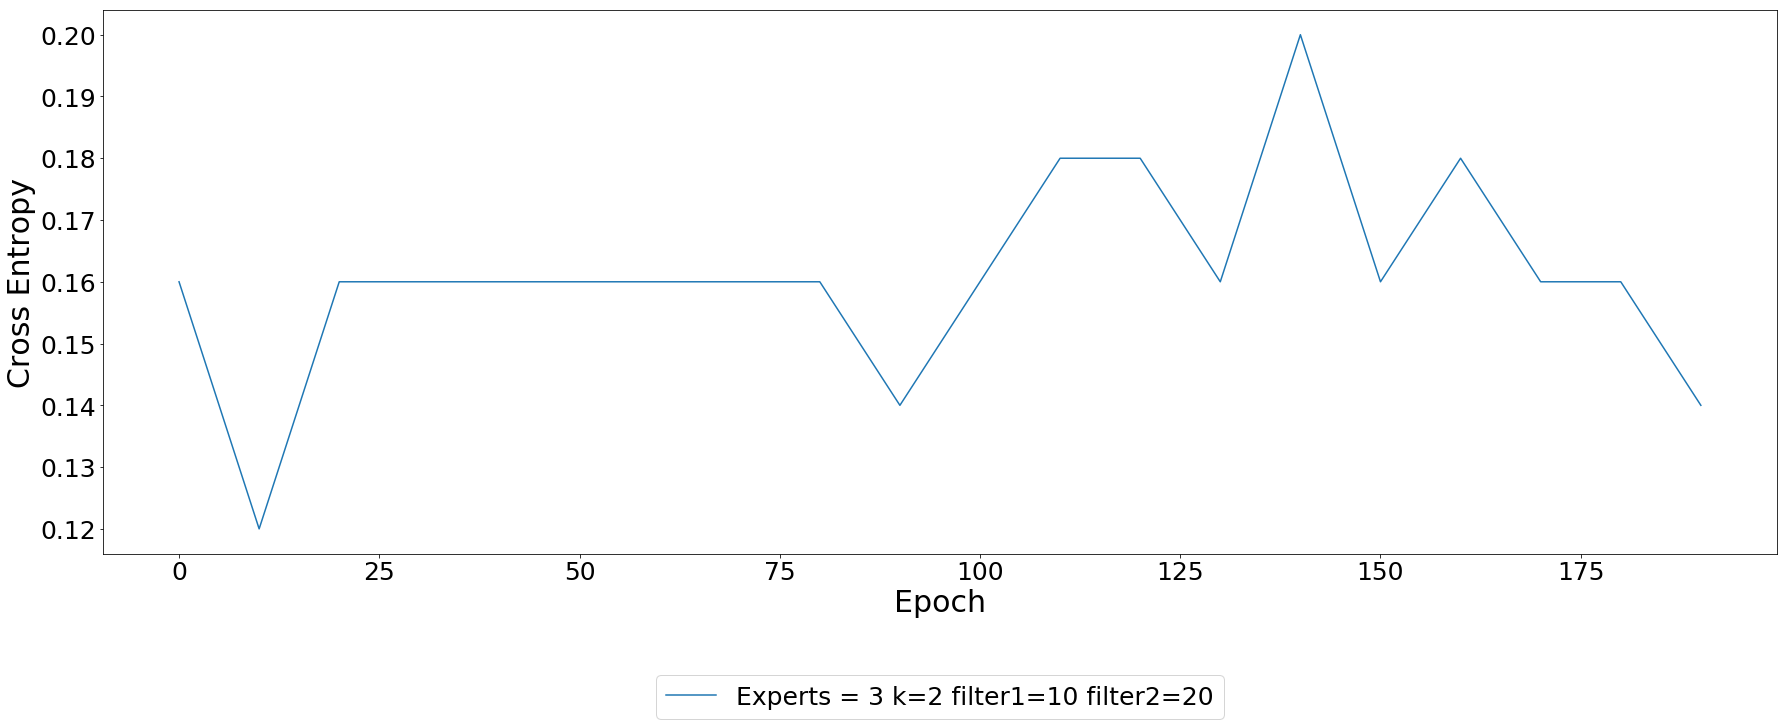

In [96]:
fig, ax = plt.subplots(figsize=(30,10))
plt.tick_params(labelsize = 25)

ax.plot(dict_res["0"]["epoch"], dict_res["0"]["acc"], label = 'Experts = 3 k=2 filter1=10 filter2=20')
ax.set_xlabel('Epoch', fontsize=30)
ax.set_ylabel('Cross Entropy', fontsize=30)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,prop={'size': 25},loc=9, bbox_to_anchor=(0.5,-0.2 ),ncol = 2)

In [28]:
d = train_network3("mix_exp",n_filters1, n_filters2, ins, outs, ins_val, outs_val)

mix_exp/x
mix_exp/y
mix_exp/labels
mix_exp/keep_prob
mix_exp/net1/AvgPool
mix_exp/net1/truncated_normal/shape
mix_exp/net1/truncated_normal/mean
mix_exp/net1/truncated_normal/stddev
mix_exp/net1/truncated_normal/TruncatedNormal
mix_exp/net1/truncated_normal/mul
mix_exp/net1/truncated_normal
mix_exp/net1/filters1
mix_exp/net1/filters1/Assign
mix_exp/net1/filters1/read
mix_exp/net1/Conv2D
mix_exp/net1/MaxPool
mix_exp/net1/truncated_normal_1/shape
mix_exp/net1/truncated_normal_1/mean
mix_exp/net1/truncated_normal_1/stddev
mix_exp/net1/truncated_normal_1/TruncatedNormal
mix_exp/net1/truncated_normal_1/mul
mix_exp/net1/truncated_normal_1
mix_exp/net1/filters2
mix_exp/net1/filters2/Assign
mix_exp/net1/filters2/read
mix_exp/net1/Conv2D_1
mix_exp/net1/Reshape/shape
mix_exp/net1/Reshape
mix_exp/net1/hidden/truncated_normal/shape
mix_exp/net1/hidden/truncated_normal/mean
mix_exp/net1/hidden/truncated_normal/stddev
mix_exp/net1/hidden/truncated_normal/TruncatedNormal
mix_exp/net1/hidden/truncated

TypeError: eval() missing 1 required positional argument: 'expr'

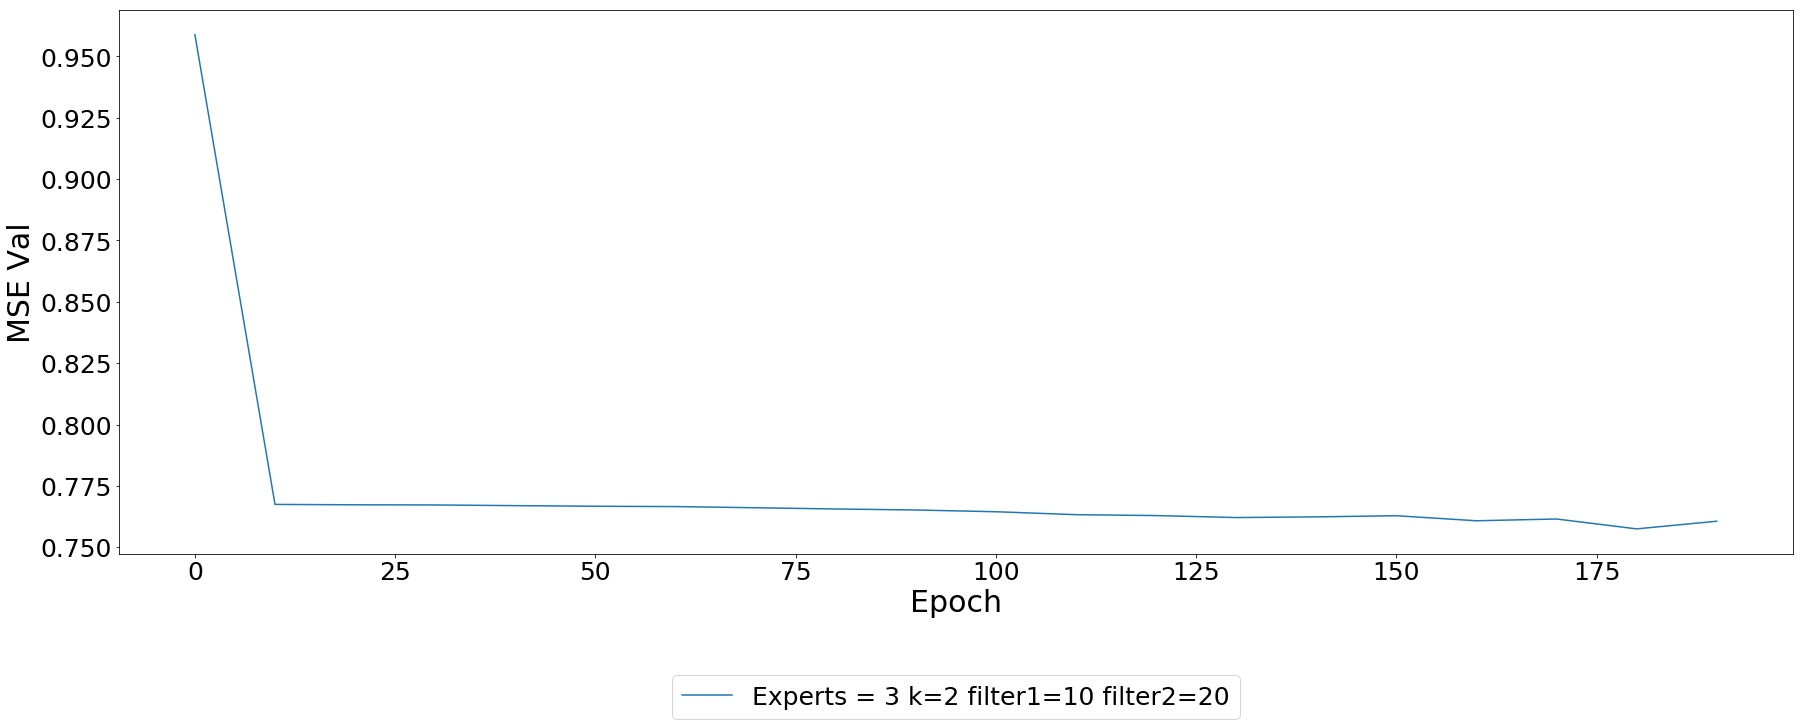

In [39]:
fig, ax = plt.subplots(figsize=(30,10))
plt.tick_params(labelsize = 25)

ax.plot(d["epoch"], d["mse_val"], label = 'Experts = 3 k=2 filter1=10 filter2=20')
ax.set_xlabel('Epoch', fontsize=30)
ax.set_ylabel('MSE Val', fontsize=30)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,prop={'size': 25},loc=9, bbox_to_anchor=(0.5,-0.2 ),ncol = 2)

In [77]:
# Reset everything
sess.close()
tf.reset_default_graph()

In [84]:
test_conf = dict_res["2"]["conf_mat"][19]
string_list = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

In [85]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [4 0 0 0 1 0 0 0 0 0]
 [2 0 2 0 1 0 0 0 0 0]
 [2 0 0 1 0 0 2 0 0 0]
 [1 1 0 1 2 0 0 0 0 0]
 [0 0 1 1 2 0 1 0 0 0]
 [0 1 1 1 1 0 1 0 0 0]
 [0 0 1 3 1 0 0 0 0 0]
 [0 1 0 4 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]]


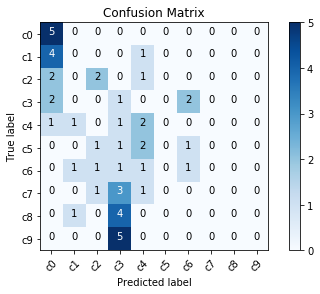

In [86]:
np.set_printoptions(precision = 2)

plt.figure()
plot_confusion_matrix(test_conf, classes = string_list, title = "Confusion Matrix")

plt.show()